In [1]:
import folium
import geopandas as gpd
import pandas as pd

In [2]:
map = folium.Map(location=[33.06,39.49], zoom_start=3)
folium.TileLayer('cartodbpositron').add_to(map)

In [3]:
map

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
countries = ["Colombia", "Peru", "Sierra Leone", "Ghana", "Uganda", "Kenya","Nigeria","Niger","Chad","Turkey","Jordan","Lebanon","Palestine", "Iraq","Syria","Myanmar","Bangladesh","India", "El Salvador"]
map_countries = world[world["name"].isin(countries)]

In [6]:

geo_json = folium.GeoJson(map_countries,
                          style_function = lambda feat: {'color':'purple', 'fillColor':'purple'},
                          highlight_function= lambda feat: {'fillColor': 'purple'})
                          #popup=folium.GeoJsonPopup(fields=['name'],labels=False ))

geo_json.add_to(map)

In [7]:
map

In [8]:
countries

['Colombia',
 'Peru',
 'Sierra Leone',
 'Ghana',
 'Uganda',
 'Kenya',
 'Nigeria',
 'Niger',
 'Chad',
 'Turkey',
 'Jordan',
 'Lebanon',
 'Palestine',
 'Iraq',
 'Syria',
 'Myanmar',
 'Bangladesh',
 'India',
 'El Salvador']

In [9]:
html = []
for i in countries: 
    link = "html/"+i+".html"
    html.append(link)

In [10]:
country_loc = [
    [4.606880,-74.071838], 
    [-12.046373,-77.042755], 
    [8.4657, -13.2317],
    [5.603717,-0.186964],
    [0.347596,32.582520],
    [-1.292066,36.821945],
    [9.0765, 7.3986],
    [13.5116,2.1254],
    [12.1348, 15.0557],
    [39.9334, 32.8597],
    [31.9539, 35.9106],
    [33.8938, 35.5018],
    [31.898043,35.204269],
    [33.3152, 44.3661],
    [33.5138, 36.2765],
    [19.7633, 96.0785],
    [23.8103, 90.4125],
    [28.6139, 77.2090],
    [13.6929, -89.2182]
    ]

In [11]:
country_loc = pd.DataFrame(country_loc)

In [12]:
df = pd.DataFrame()
df = df.assign(Name = countries, html_file = html, Latitude = country_loc[0], Longitude=country_loc[1])

In [13]:
for i in range(0,len(df)):
    html="""
    <iframe src=\"""" + df['html_file'][i] + """\" width="850" height="400"  frameborder="0">    
    """
    
    popup = folium.Popup(folium.Html(html, script=True))
    pushpin = folium.features.CustomIcon('./images/purple_pin.png', icon_size=(15,30))
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]],
                  popup=popup,icon=pushpin).add_to(map)
    

In [14]:
df

Name               html_file   Latitude  Longitude
0       Colombia      html/Colombia.html   4.606880 -74.071838
1           Peru          html/Peru.html -12.046373 -77.042755
2   Sierra Leone  html/Sierra Leone.html   8.465700 -13.231700
3          Ghana         html/Ghana.html   5.603717  -0.186964
4         Uganda        html/Uganda.html   0.347596  32.582520
5          Kenya         html/Kenya.html  -1.292066  36.821945
6        Nigeria       html/Nigeria.html   9.076500   7.398600
7          Niger         html/Niger.html  13.511600   2.125400
8           Chad          html/Chad.html  12.134800  15.055700
9         Turkey        html/Turkey.html  39.933400  32.859700
10        Jordan        html/Jordan.html  31.953900  35.910600
11       Lebanon       html/Lebanon.html  33.893800  35.501800
12     Palestine     html/Palestine.html  31.898043  35.204269
13          Iraq          html/Iraq.html  33.315200  44.366100
14         Syria         html/Syria.html  33.513800  36.276500
15       Myanmar       html/Myanmar.html  19.763300  96.078500
16    Bangladesh    html/Bangladesh.html  23.810300  90.412500
17         India         html/India.html  28.613900  77.209000
18   El Salvador   html/El Salvador.html  13.692900 -89.218200


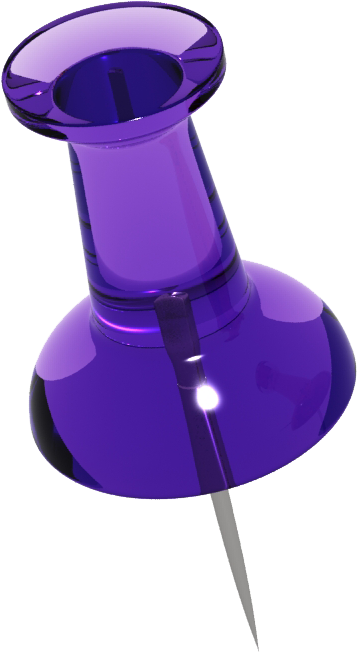
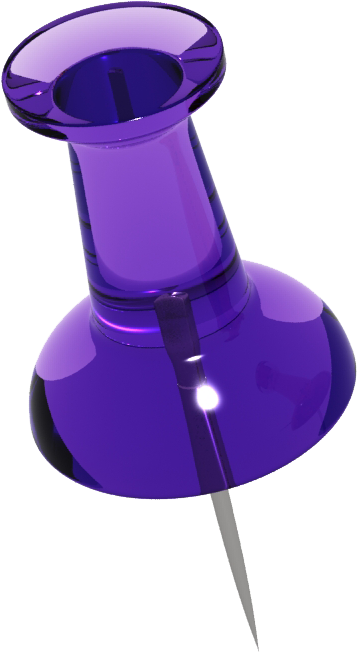
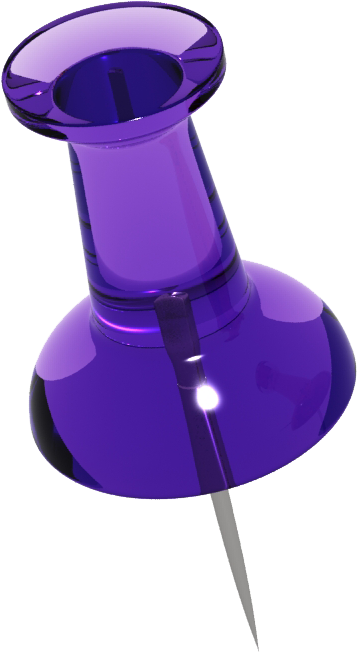
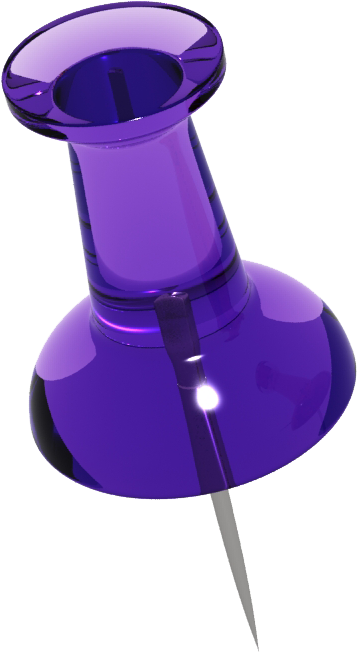
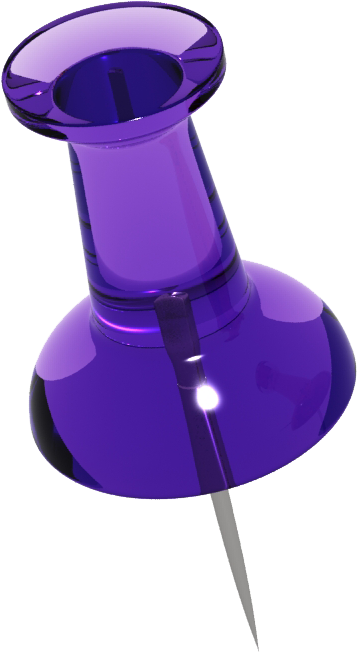
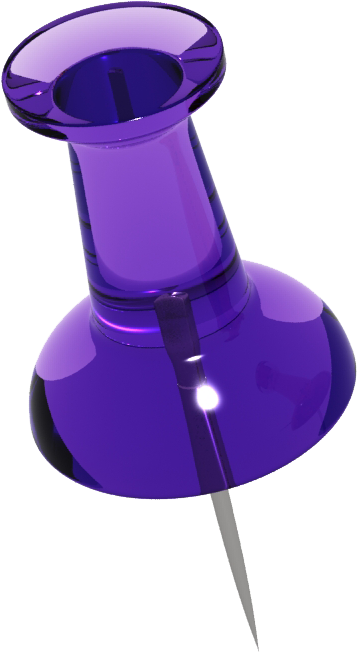
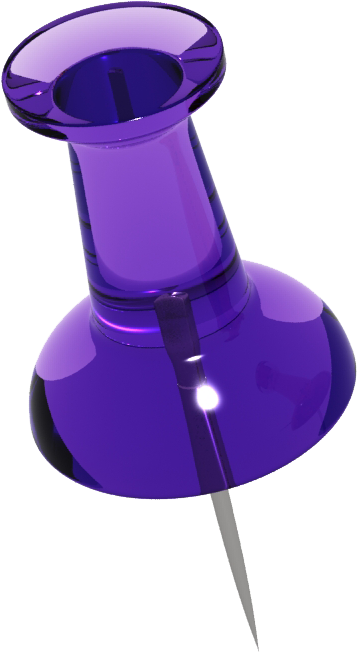
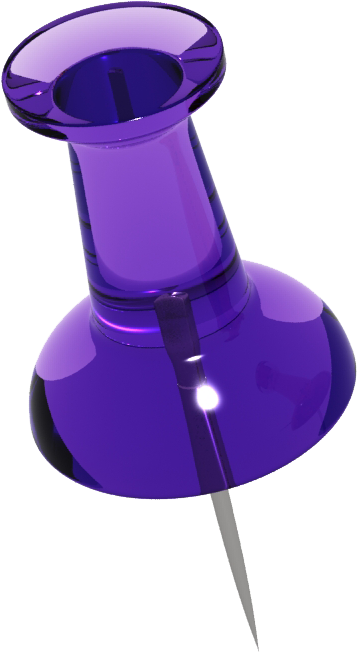
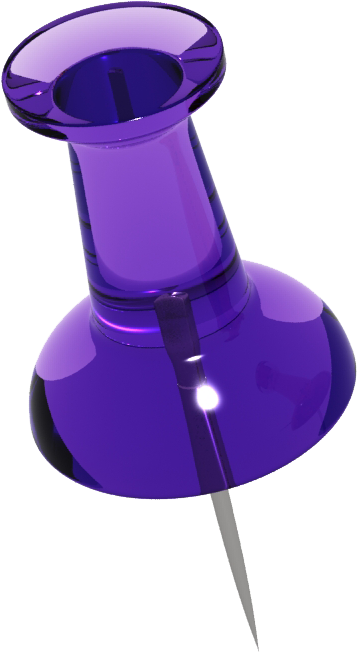
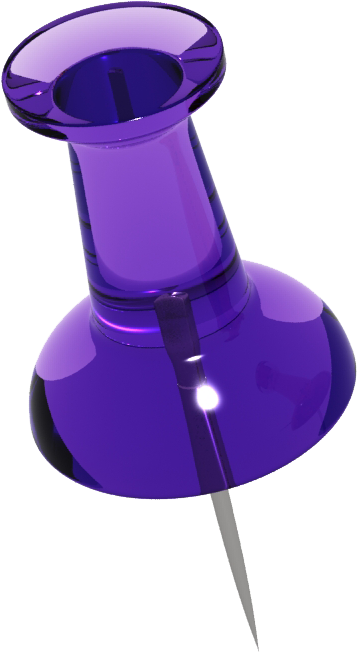
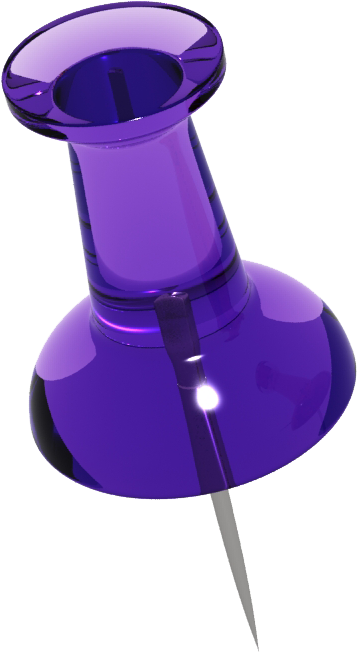
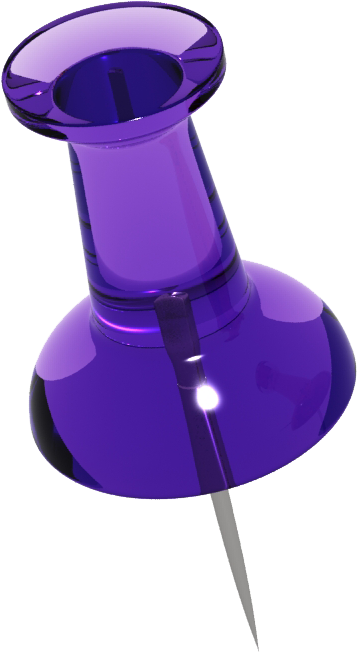
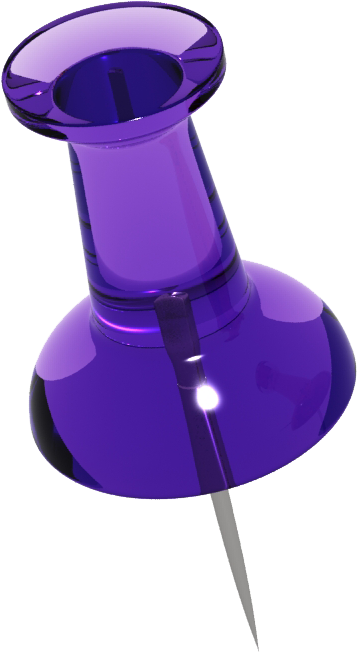
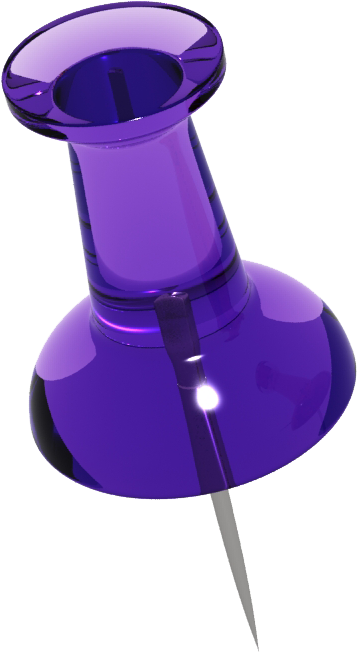
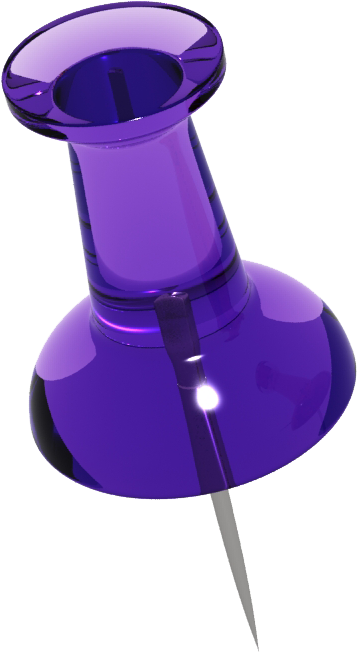
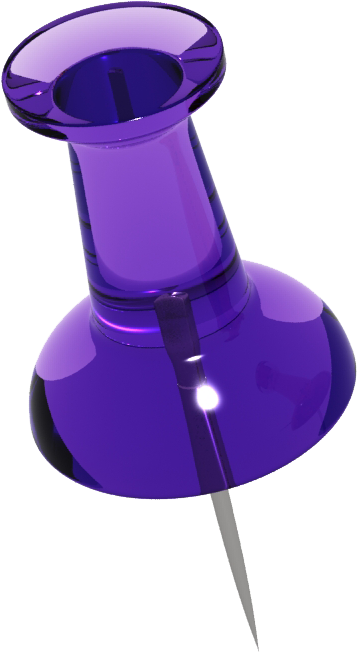
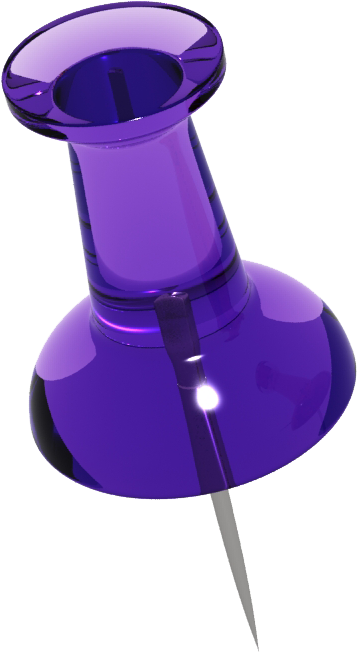

In [15]:
map